# Clean and analyze employee exit surveys
## Introduction
This project aims at analyzing surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. In particular, it intends to answer the following question raised by our stakeholders:
 * Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
 
The [DETE](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey) and [TAFE](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) datasets were downloaded from the Australian website for open government data.

In [1]:
%reset -f

import numpy as np
import pandas as pd

# Import and preview the DETE data
dete_survey = pd.read_csv("DETE_survey.csv")
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [2]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [3]:
# Import and preview the TAFE data
tafe_survey = pd.read_csv("TAFE_survey.csv")
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [4]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

Based on the data preview, we conclude that:
 * The DETE and TAFE data sets contain several columns that are not necessary for this study;
 * The DETE dataframe contains "Not Stated" values that indicate values are missing. These need to be replaced with NaN;
 * The two dataframes have columns with the same information but different name.
 
## Data cleaning
### Identify missing values and remove unnecessary columns

In [5]:
# Import and preview the DETE data. Read 'Not Stated' values as NaN
dete_survey = pd.read_csv("DETE_survey.csv", na_values="Not Stated")
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [6]:
# Remove unnecessary columns
dete_survey.drop(dete_survey.columns[28:49], axis=1, inplace=True)
tafe_survey.drop(tafe_survey.columns[17:66], axis=1, inplace=True)

### Check column names

In [7]:
# Column names of the DETE dataframe
dete_survey.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [8]:
# Column names of the TAFE dataframe
tafe_survey.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

The two dataframes have columns with the same information but different name. Below are some of the columns that we will use in this project.

DETE dataframe | TAFE dataframe | Description
--- | --- | ---
ID | Record ID | An id used to identify the participant of the survey
SeparationType | Reason for ceasing employment | The reason why the participant's employment ended
Cease Date | CESSATION YEAR | The year or month the participant's employment ended
DETE Start Date |  | The year the participant began employment with the DETE
 | LengthofServiceOverall. Overall ... (in years) | The length of the person's employment (in years)
Age | CurrentAge. Current Age | The age of the participant
Gender | Gender. What is your Gender? | The gender of the participant

We will standardize the names of the columns to be easier to combine the data in both dataframes.

In [9]:
# Rename some column names of TAFE dataframe
mapper = {
    'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
    }

tafe_survey.rename(mapper, axis=1, inplace=True)

# Clean the column names
dete_survey.columns = dete_survey.columns.str.lower().str.strip().str.replace(' ', '_')
tafe_survey.columns = tafe_survey.columns.str.lower().str.strip().str.replace(' ', '_')

### Remove unnecessary rows¶

This study only analyses survey respondents who resigned. Let us look at the unique values contained in the column `separationtype`.

In [10]:
dete_survey['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [11]:
tafe_survey['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

We are only interested in the rows that contain the string 'resignation'.

In [12]:
# Extract the rows that contain the string 'resignation'
dete_resignations = dete_survey[dete_survey['separationtype'].str.lower().str.contains('resignation', na=False)].copy().reset_index()
tafe_resignations = tafe_survey[tafe_survey['separationtype'].str.lower().str.contains('resignation', na=False)].copy().reset_index()

### Verify the data

In [29]:
# Check the data types of some columns
dete_resignations[['cease_date', 'dete_start_date']].dtypes

cease_date          object
dete_start_date    float64
dtype: object

In [14]:
tafe_resignations[['cease_date', 'institute_service']].dtypes

cease_date           float64
institute_service     object
dtype: object

In [15]:
# Check the values of the column institute_service
tafe_resignations['institute_service'].value_counts(dropna=False).sort_values()

More than 20 years    10
7-10                  21
11-20                 26
5-6                   33
NaN                   50
3-4                   63
1-2                   64
Less than 1 year      73
Name: institute_service, dtype: int64

The column `cease_date` of the DETE data set needs to be converted to numerical values. Regarding the years of service, we'll base our analysis on this [article]( https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which makes the argument that understanding employee's needs according to career stage instead of age is more effective. This article uses the following definitions of years of service at a company:
 * `New`: Less than 3 years;
 * `Experienced`: 3-6 years;
 * `Established`: 7-10 years;
 * `Veteran`: 11 or more years.
 
The DETE dataframe does not have a column with the years of service, but we can calculate this based on other columns. The TAFE dataframe has a column with the years of service, but we will need to modify the categories.

### Convert the data and create new columns

**DETE data set**

In [16]:
# Unique values of the cease_date column
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
07/2006      1
09/2010      1
2010         1
Name: cease_date, dtype: int64

In [17]:
# Extract the year and convert to float
dete_resignations['cease_date_num'] = dete_resignations['cease_date'].str.extract(r'([0-9]{4})').astype(float)

# Check the columns cease_date_num and dete_start_date
dete_resignations[['dete_start_date', 'cease_date_num']].describe()

,dete_start_date,cease_date_num
count,283.000000,300.00000
mean,2002.067138,2012.60000
std,9.914479,0.75403
min,1963.000000,2006.00000
25%,1997.000000,2012.00000
50%,2005.000000,2013.00000
75%,2010.000000,2013.00000
max,2013.000000,2014.00000


In [18]:
# Calculate the years of service
dete_resignations['institute_service'] = dete_resignations['cease_date_num'] - dete_resignations['dete_start_date']

# Check the values
dete_resignations['institute_service'].describe()

count    273.000000
mean      10.457875
std        9.931709
min        0.000000
25%        3.000000
50%        7.000000
75%       16.000000
max       49.000000
Name: institute_service, dtype: float64

In [19]:
# Group the years of service into categories
def years_of_service_cat(years):
        
    if pd.isnull(years):
        return np.nan
        
    elif years < 3:
        return 'New'
            
    elif years < 7:
        return 'Experienced'
            
    elif years < 11:
        return 'Established'
    
    else:
        return 'Veteran'

dete_resignations['institute_service_cat'] = dete_resignations['institute_service'].apply(years_of_service_cat)

dete_resignations['institute_service_cat'].value_counts(dropna=False).sort_values()

NaN             38
Established     41
New             56
Experienced     76
Veteran        100
Name: institute_service_cat, dtype: int64

**TAFE data set**

In [20]:
# Extract the year from the column institute_service
tafe_resignations['institute_service_num'] = tafe_resignations['institute_service'] .str.extract(r'[ -](\d+)', expand=False).astype(float)
tafe_resignations['institute_service_num'].value_counts(dropna=False).sort_values()

10.0    21
6.0     33
20.0    36
NaN     50
4.0     63
2.0     64
1.0     73
Name: institute_service_num, dtype: int64

In [21]:
# Check the converted values
tafe_resignations['institute_service'].value_counts(dropna=False).sort_values()

More than 20 years    10
7-10                  21
11-20                 26
5-6                   33
NaN                   50
3-4                   63
1-2                   64
Less than 1 year      73
Name: institute_service, dtype: int64

Although, the conversion combined the categories “More than 20 years” and “11-20”, that does not affect the grouping into the categories defined previously (New, Experienced, Established and Veteran).

In [22]:
# Group the years of service into categories
tafe_resignations['institute_service_cat'] = tafe_resignations['institute_service_num'].apply(years_of_service_cat)

tafe_resignations['institute_service_cat'].value_counts(dropna=False).sort_values()

Established     21
Veteran         36
NaN             50
Experienced     96
New            137
Name: institute_service_cat, dtype: int64

## Data analysis
### Identifying dissatisfied employees
To identify dissatisfied employees, we will analyse the following columns of the DETE data set:
 * job_dissatisfaction
 * dissatisfaction_with_the_department
 * physical_work_environment
 * lack_of_recognition
 * lack_of_job_security
 * work_location
 * employment_conditions
 * work_life_balance
 * workload
 
And for the TAFE data set:
  * contributing_factors._dissatisfaction
  * contributing_factors._job_dissatisfaction

In [23]:
# Columns of the DETE data set used to analyse dissatisfaction
dete_dissatisfaction_columns = ['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment',
                                'lack_of_recognition', 'lack_of_job_security', 'work_location', 'employment_conditions',
                                'work_life_balance', 'workload']

# Unique values of these columns
np.unique(dete_resignations[dete_dissatisfaction_columns].to_numpy().flatten())

array([False,  True])

A `True` value means that employee was dissatisfied.

In [24]:
# Unique values of the columns of the TAFE data set used to analyse dissatisfaction
tafe_dissatisfaction_columns = ['contributing_factors._dissatisfaction','contributing_factors._job_dissatisfaction'];

print(tafe_resignations[tafe_dissatisfaction_columns[0]].unique())
print(tafe_resignations[tafe_dissatisfaction_columns[1]].unique())

['-' 'Contributing Factors. Dissatisfaction ' nan]
['-' 'Job Dissatisfaction' nan]


A value of `-` means the employee was satisfied, and a value of `NaN` means missing data. All other values indicate that the employee was dissatisfied. We will create the `dissatisfied` column in both data sets with the following values:
 * `True`: indicates a person resigned because they were dissatisfied with the job;
 * `False`: indicates a person resigned because of a reason other than dissatisfaction with the job;
 * `NaN` indicates the value is missing.

There is no missing data in the DETE data set. Now we will convert the data in the columns of the TAFE data set to True/False.

In [25]:
# Replace the values in the TAFE data set with True, False and NaN
def update_val(val):
    
    if pd.isnull(val):
        return np.nan
        
    elif val == '-':
        return False
    else:
        return True

tafe_resignations[tafe_dissatisfaction_columns] = tafe_resignations[tafe_dissatisfaction_columns].applymap(update_val)

In [26]:
# Create the dissatisfied column for the DETE data set
dete_resignations['dissatisfied'] = dete_resignations[dete_dissatisfaction_columns].any(axis=1, skipna=False)

# Check the values
dete_resignations['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [27]:
# Create the dissatisfied column for the TAFE data set
tafe_resignations['dissatisfied'] = tafe_resignations[tafe_dissatisfaction_columns].any(axis=1, skipna=False)

# Check the values
tafe_resignations['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

### Results
We'll add an institute column to differentiate the data from each survey and after we will combine both data sets.

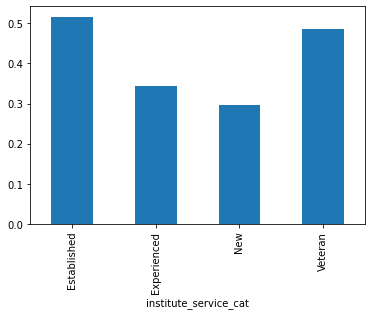

In [28]:
# Add an institute column
dete_resignations['institute'] = 'DETE'
tafe_resignations['institute'] = 'TAFE'

# Create a new dataframe with the relevant data
columns = ['id','institute','institute_service_cat','dissatisfied']
resignations = pd.concat([dete_resignations[columns],tafe_resignations[columns]])

# Calculate the percentage of dissatisfied employees for each category of years of service.
grouped = resignations.groupby("institute_service_cat")

dissatisfied = grouped['dissatisfied'].sum() / grouped['dissatisfied'].count()

# Plot the results
dissatisfied.plot.bar();

Based on this preliminary analysis, we can conclude that established or veteran employees (7 or more years of service) have the highest percentage of leaving due to dissatisfaction.